 Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization. 

+-------+-------+-----------+------------------+---------------------+
|   r_k |   n_k |   Pr(r_k) |   Cumulative n_k |   Equalized Rounded |
+=======+=======+===========+==================+=====================+
|     0 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     1 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     2 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     3 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     4 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     5 |     1 |  4e-06    |                0 |            0.061408 |
+-----

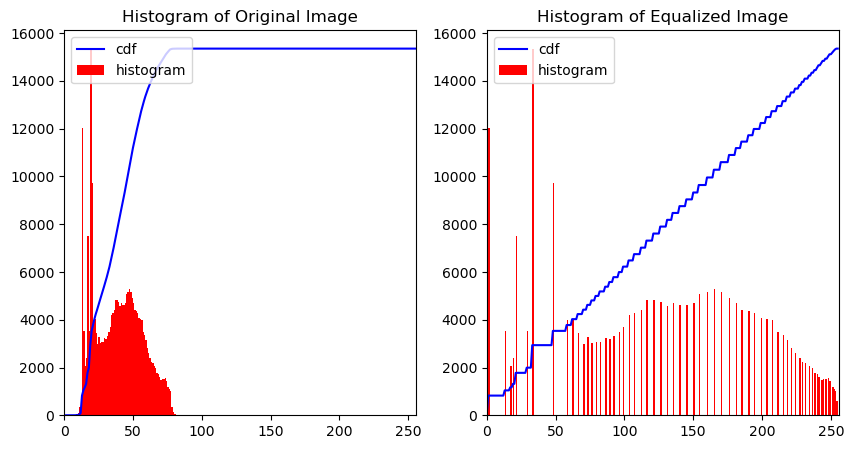

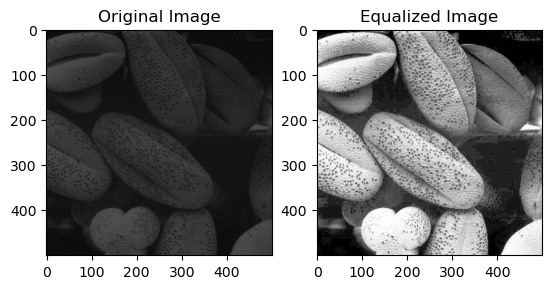

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def load_image(filename):
    # Load the image in grayscale
    grayscale_img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    return grayscale_img

def compute_histogram(image):
    # Compute the histogram of the input image
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    return hist, bins

def compute_cumulative_histogram(hist):
    # Compute the cumulative histogram
    cumulative_hist = hist.cumsum()
    normalized_cumulative_hist = cumulative_hist * hist.max() / cumulative_hist.max()
    return cumulative_hist, normalized_cumulative_hist

def compute_probabilities(hist):
    # Compute probabilities for each intensity level
    probabilities = hist / np.sum(hist)
    return probabilities

def compute_cumulative_sum(hist):
    # Compute the cumulative sum of pixels
    cumulative_sum = np.zeros(256)
    for i in range(len(cumulative_sum)):
        cumulative_sum[i] = np.sum(hist[:i])
    return cumulative_sum

def equalize_histogram(image, cumulative_sum):
    # Equalize the image using the cumulative sum
    equalized_cumulative_sum = np.zeros(256)
    for x in range(len(equalized_cumulative_sum)):
        equalized_cumulative_sum[x] = (cumulative_sum[x] * 255) / image.size
    equalized_cumulative_sum = equalized_cumulative_sum.astype('uint8')

    equalized_image = np.zeros(image.shape)
    for i in range(len(image)):
        for j in range(len(image[i])):
            equalized_image[i][j] = equalized_cumulative_sum[image[i][j]]
    equalized_image = equalized_image.astype('uint8')
    return equalized_image

# Load the grayscale image
original_image = load_image('images\en3160_assignment_01_Page_3_Image_0001.jpg')

# Compute Histograms
histogram, bins = compute_histogram(original_image)
cumulative_hist, normalized_cumulative_hist = compute_cumulative_histogram(histogram)
probabilities = compute_probabilities(histogram)
cumulative_sum = compute_cumulative_sum(histogram)

# Equalize the histogram
equalized_image = equalize_histogram(original_image, cumulative_sum)

# Combine arrays into a list of tuples
combined_data = list(zip(np.arange(256), histogram, probabilities, cumulative_sum, normalized_cumulative_hist))

# Define headers for the columns
headers = ['r_k', 'n_k', 'Pr(r_k)', 'Cumulative n_k', 'Equalized Rounded']

# Print the combined data using tabulate
table = tabulate(combined_data, headers=headers, tablefmt='grid')
print(table)

# Plot histograms
equalized_histogram, _ = compute_histogram(equalized_image)
cdf_equalized, normalized_cdf_equalized = compute_cumulative_histogram(equalized_histogram)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(normalized_cumulative_hist, color='b')
ax[0].hist(original_image.flatten(), 256, [0, 256], color='r')
ax[0].set_xlim([0, 256])
ax[0].legend(('cdf', 'histogram'), loc='upper left')
ax[0].set_title("Histogram of Original Image")


ax[1].plot(normalized_cdf_equalized, color='b')
ax[1].hist(equalized_image.flatten(), 256, [0, 256], color='r')
ax[1].set_xlim([0, 256])
ax[1].legend(('cdf', 'histogram'), loc='upper left')
ax[1].set_title("Histogram of Equalized Image")
plt.savefig('Q5 Histogram of original Equalized Image.png')
plt.show()

# Display original and equalized images side by side
fig, ax = plt.subplots(1, 2)

ax[0].imshow(original_image, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(equalized_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Equalized Image")
plt.savefig('Q5 qriginal Equalized Image.png')
plt.show()


Initial try

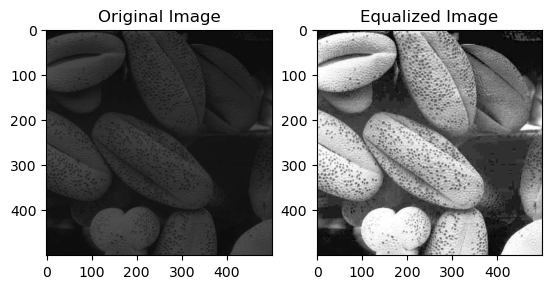

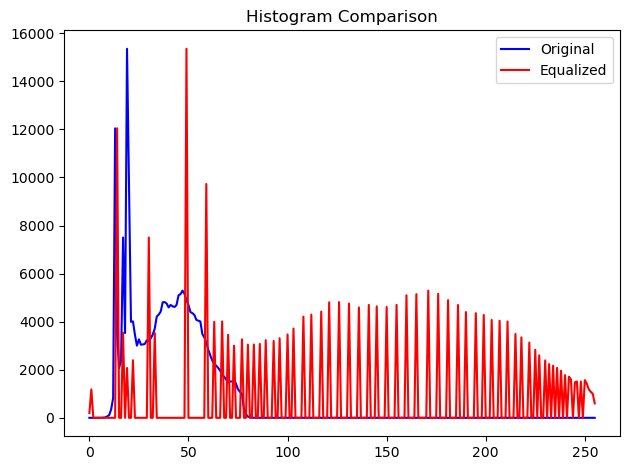

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def histogram_equalization(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()
    
    # Apply histogram equalization
    equalized_image = cv.equalizeHist(gray_image)
    
    return equalized_image

# Load the original image
img_orig = cv.imread('images\en3160_assignment_01_Page_3_Image_0001.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale for histogram equalization
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)

# Perform histogram equalization
img_equalized = histogram_equalization(img_gray)

# Create subplots
f, axarr = plt.subplots(1, 2)

# Display the original and equalized images
axarr[0].imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))
axarr[0].set_title("Original Image")

axarr[1].imshow(img_equalized, cmap='gray')
axarr[1].set_title("Equalized Image")

# Plot histograms
hist_orig = cv.calcHist([img_gray], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([img_equalized], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist_orig, color='b', label='Original')
plt.plot(hist_equalized, color='r', label='Equalized')
plt.title("Histogram Comparison")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Alternative

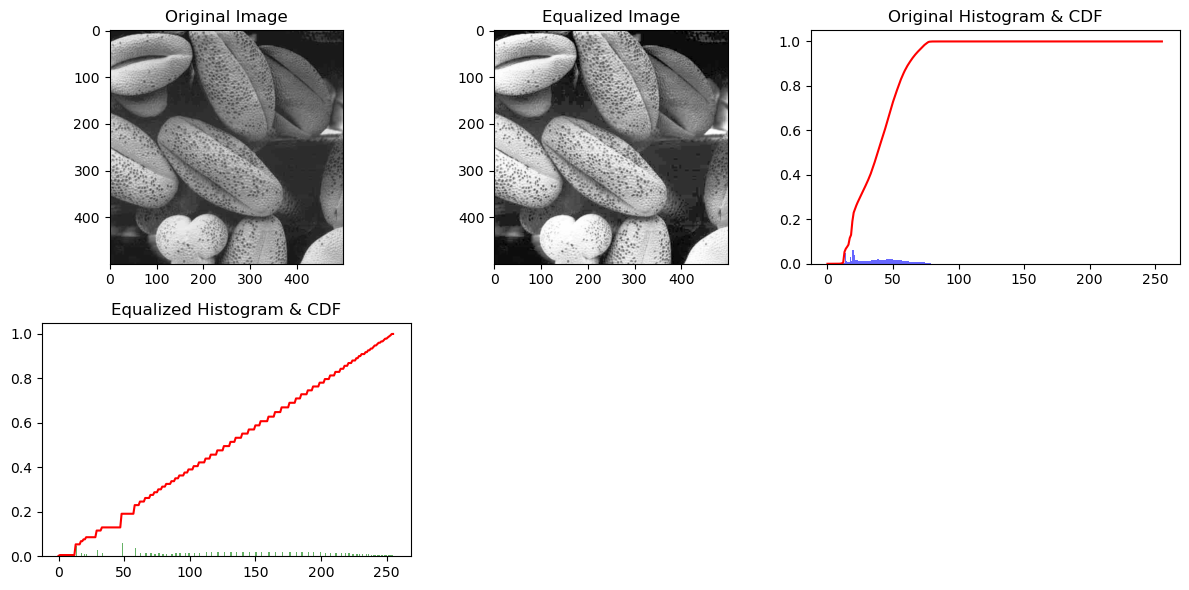

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images\en3160_assignment_01_Page_3_Image_0001.jpg', cv.IMREAD_GRAYSCALE)

# Compute the histogram of the input image
def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

# Compute the cumulative histogram
def compute_cumulative_histogram(histogram):
    cumulative_histogram = np.zeros(256, dtype=int)
    cumulative_histogram[0] = histogram[0]
    for i in range(1, 256):
        cumulative_histogram[i] = cumulative_histogram[i - 1] + histogram[i]
    return cumulative_histogram

# Perform histogram equalization
def histogram_equalization(image, histogram, cumulative_histogram, num_pixels):
    equalized_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            equalized_value = int(255 * cumulative_histogram[pixel_value] / num_pixels)
            equalized_image[y, x] = equalized_value
    return equalized_image

# Compute the histogram of the original image
histogram = compute_histogram(image)
num_pixels = image.shape[0] * image.shape[1]

# Compute the cumulative distribution function (CDF)
cumulative_histogram = compute_cumulative_histogram(histogram)
cdf = cumulative_histogram / num_pixels

# Equalize the image
equalized_image = histogram_equalization(image, histogram, cumulative_histogram, num_pixels)

# Compute the histogram of the equalized image
equalized_histogram = compute_histogram(equalized_image)

# Compute the cumulative distribution function (CDF) of the equalized image
equalized_cdf = compute_cumulative_histogram(equalized_histogram) / num_pixels

# Display the original image, equalized image, and their respective histograms and CDFs
plt.figure(figsize=(12, 6))

plt.subplot(, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 3, 3)
plt.hist(image.flatten(), bins=256, range=(0, 256), density=True, color='b', alpha=0.6)
plt.plot(cdf, color='r')
plt.title('Original Histogram & CDF')

plt.subplot(2, 3, 4)
plt.hist(equalized_image.flatten(), bins=256, range=(0, 256), density=True, color='g', alpha=0.6)
plt.plot(equalized_cdf, color='r')
plt.title('Equalized Histogram & CDF')

plt.tight_layout()
plt.show()


+-------+-------+-----------+------------------+---------------------+
|   r_k |   n_k |   Pr(r_k) |   Cumulative n_k |   equalized rounded |
+=======+=======+===========+==================+=====================+
|     0 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     1 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     2 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     3 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     4 |     0 |  0        |                0 |            0        |
+-------+-------+-----------+------------------+---------------------+
|     5 |     1 |  4e-06    |                0 |            0.061408 |
+-----

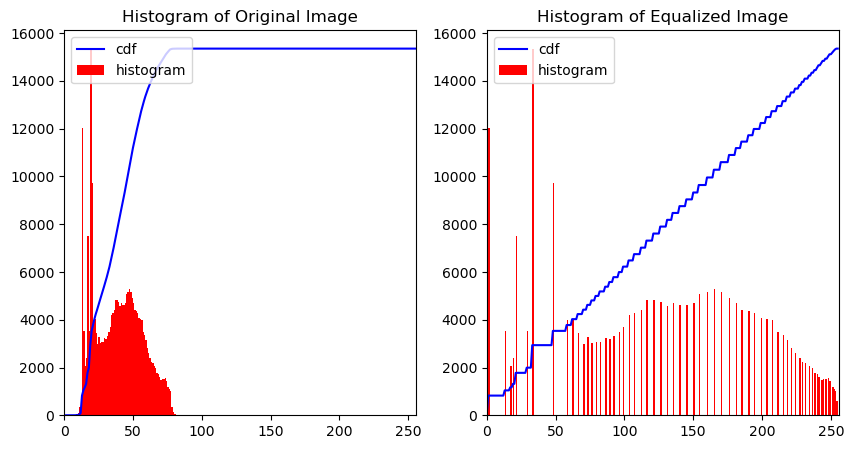

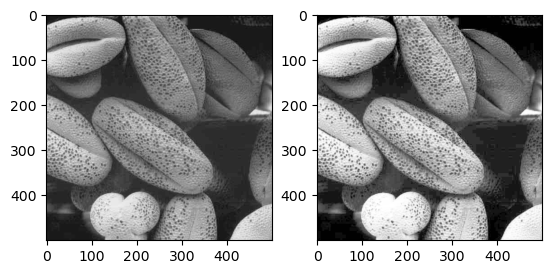